#### Import packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # for encoding categorical labels
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import ttest_ind

#### Define the dataset

In [3]:
data = pd.read_csv('sentimentdataset.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
print(df.info()) #check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


#### Data Processing

In [5]:
labelenc = LabelEncoder() #label encoder instance
df['Sentiment_encoded'] = labelenc.fit_transform(df['Sentiment'])

df['combined'] = df['Text'].astype(str) + " " + df['Hashtags'].astype(str)


vecto = TfidfVectorizer()
text_vec = vecto.fit_transform(df['combined'])



#create a mapping of original labels to encoded values
mapping = {label: int(idx) for idx, label in enumerate(labelenc.classes_)}
print("Label -> Encoded mapping:")
for label, idx in mapping.items():
    print(f"{label} -> {idx}")


Label -> Encoded mapping:
 Acceptance    -> 0
 Acceptance       -> 1
 Accomplishment  -> 2
 Admiration  -> 3
 Admiration    -> 4
 Admiration     -> 5
 Adoration     -> 6
 Adrenaline      -> 7
 Adventure  -> 8
 Affection     -> 9
 Amazement  -> 10
 Ambivalence  -> 11
 Ambivalence      -> 12
 Amusement     -> 13
 Amusement      -> 14
 Anger         -> 15
 Anticipation  -> 16
 Anticipation   -> 17
 Anxiety    -> 18
 Anxiety          -> 19
 Appreciation   -> 20
 Apprehensive  -> 21
 Arousal        -> 22
 ArtisticBurst  -> 23
 Awe  -> 24
 Awe     -> 25
 Awe           -> 26
 Awe            -> 27
 Bad  -> 28
 Betrayal  -> 29
 Betrayal       -> 30
 Bitter        -> 31
 Bitterness  -> 32
 Bittersweet  -> 33
 Blessed        -> 34
 Boredom  -> 35
 Boredom          -> 36
 Breakthrough  -> 37
 Calmness      -> 38
 Calmness       -> 39
 Captivation  -> 40
 Celebration  -> 41
 Celestial Wonder  -> 42
 Challenge  -> 43
 Charm  -> 44
 Colorful  -> 45
 Compassion -> 46
 Compassion     -> 47
 Compassiona

<Axes: xlabel='Sentiment'>

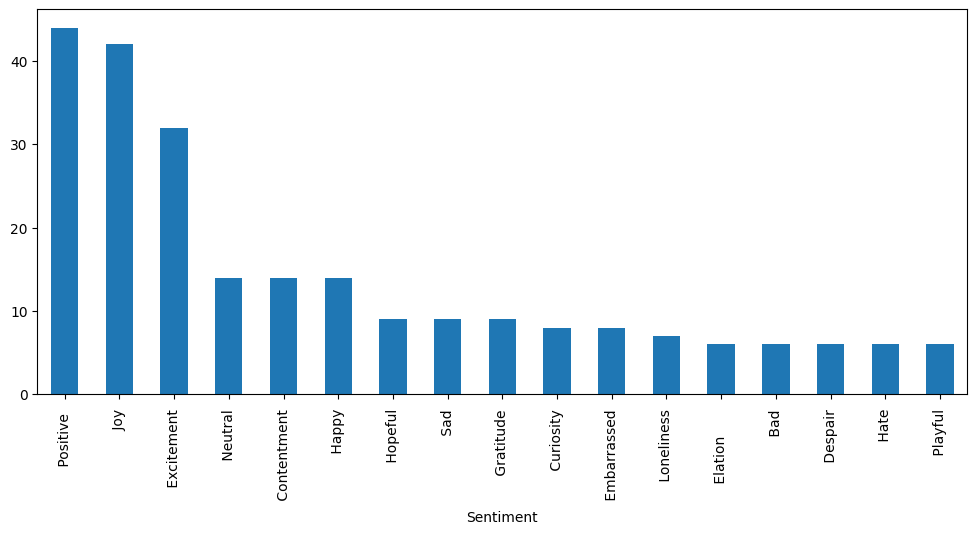

In [ ]:
filtered = df['Sentiment'].value_counts()[df['Sentiment'].value_counts() > 5]
filtered.plot(kind='bar', figsize=(12,5))



** H0 : There is no difference in average engagement between positive and negative tweets **

** H1 : There is a difference in average engagement between positive and negative tweets **

Welch t-test: t=9.346, p=0.0000


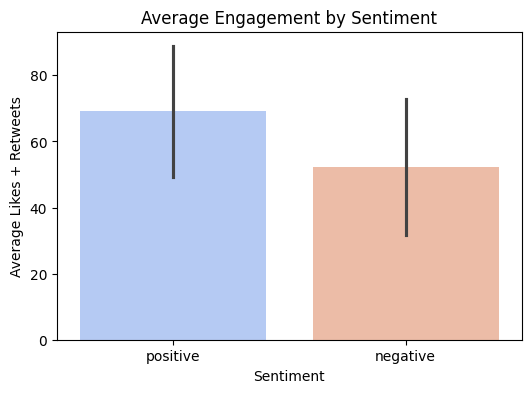

In [ ]:
## comparing engagement based on sentiment

# getting engagement count
engagement = []
for retweet, like in zip(df['Retweets'],  df['Likes']):
    total = like + retweet
    engagement.append(total)

df['Engagement'] = engagement
df

import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## normalize the labels
df['Sentiment_norm'] = df['Sentiment'].astype(str).str.strip().str.lower()

## put each sentiment into buckets

pos = {
    'positive','happiness','joy','love','amusement','enjoyment','admiration',
    'affection','awe','surprise','acceptance','adoration','anticipation',
    'kind','pride','excitement','optimistic','gratitude'
}

neg = {
    'negative','anger','fear','sadness','disgust','disappointed','bitter',
    'shame'
}

neu = {'neutral', 'confusion','acceptance','calmness'}

sentiment_map = {}
sentiment_map.update({k:'positive' for k in pos})
sentiment_map.update({k:'negative' for k in neg})
sentiment_map.update({k:'netrual' for k in neu})

df['Polarity'] = df['Sentiment_norm'].map(sentiment_map)

## for sentiments that are not mapped, use vader on the text
sia = SentimentIntensityAnalyzer()
def vader_bucket(text):
    c = sia.polarity_scores(str(text))['compound']
    return 'positive' if c > 0.05 else ('negative' if c < -0.05 else 'neutral')

df.loc[df['Polarity'].isna(), 'Polarity'] = df.loc[df['Polarity'].isna(), 'Text'].apply(vader_bucket)

## keep groups with atleast 5 tweets
counts = df['Polarity'].value_counts()
keep = counts[counts >=  5].index
df_f = df[df['Polarity'].isin(keep)]

## compare the means

pos_eng = df_f.loc[df_f['Polarity'] == 'positive', 'Engagement']
neg_eng = df_f.loc[df_f['Polarity'] == 'negative', 'Engagement']

t_stat, p_val = ttest_ind(pos_eng, neg_eng, equal_var=False)

print("Welch t-test: t=%.3f, p=%.4f" % (t_stat, p_val))

df_subset = df_f[df_f['Polarity'].isin(['positive', 'negative'])]

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    data=df_subset,
    x='Polarity',
    y='Engagement',
    hue='Polarity',
    legend=False,
    errorbar='sd',
    palette='coolwarm'
)
plt.title('Average Engagement by Sentiment')
plt.ylabel('Average Likes + Retweets')
plt.xlabel('Sentiment')
plt.show()






    

Becaue the p value is < 0.05, I can reject the null hypothesis that there is no difference in engagement between positive and negative tweets
